## Segmentation

In [2]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
[Fs, x] = aIO.read_audio_file("pyAudioAnalysis/data/IS1000a.Headset-0.wav")

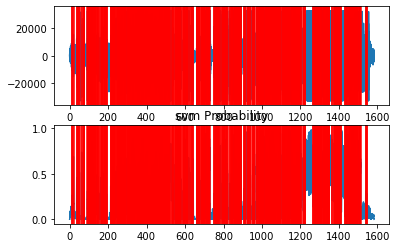

In [30]:
segments = aS.silenceRemoval(x, Fs, 0.020, 0.020, smoothWindow = 1.0, weight = 0.3, plot = True)

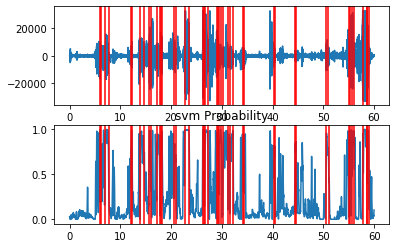

In [25]:
segments2 = aS.silenceRemoval(x, Fs, 0.020, 0.020, smoothWindow = 0.1, weight = 0.6, plot = True)

In [26]:
segments2

[[5.92, 6.140000000000001],
 [6.96, 7.66],
 [12.040000000000001, 12.32],
 [13.94, 14.74],
 [15.64, 15.94],
 [17.2, 17.740000000000002],
 [17.92, 18.26],
 [20.62, 20.92],
 [22.66, 23.6],
 [26.2, 26.5],
 [26.64, 27.26],
 [29.0, 29.3],
 [29.48, 29.92],
 [30.240000000000002, 31.14],
 [31.62, 32.24],
 [34.22, 34.44],
 [40.22, 40.46],
 [44.4, 44.64],
 [50.52, 51.02],
 [55.08, 55.300000000000004],
 [55.660000000000004, 56.08],
 [57.9, 58.56],
 [58.64, 58.92]]

## Basic feature extraction

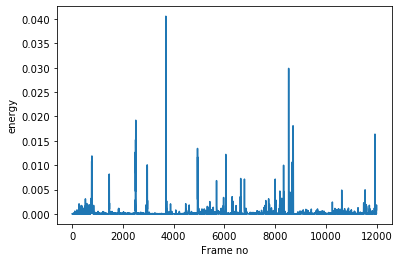

In [14]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
[Fs, x] = audioBasicIO.read_audio_file("pyAudioAnalysis/lesCoupes/spk0_coupe1.wav")
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
#plt.subplot(1,1,1); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [89]:
df=pd.DataFrame(columns=['speaker', 'avE', 'minE', 'maxE', 'avZCR', 'maxZCR', 'avSpc', 'avMfc'])
df['speaker'] = [0, 1, 2, 3]


for i in range(0,4):
    print('Speaker', i, 'Processing...')
    [Fs, x] = audioBasicIO.read_audio_file("pyAudioAnalysis/lesCoupes/spk"+str(i)+"_coupe6.wav")
    F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
    
    #Compute features

    #energy
    avE = F[1].mean()
    minE = F[1].min()
    maxE = F[1].max()

    #ZCR
    avZCR = F[0].mean()
    maxZCR = F[0].max()
    #minZCR = F[0].min()

    #spectral
    avSpc = F[4].mean()

    #mfc
    avMfc = F[9].mean()
    
    df.loc[i, 'avE'] = avE
    df.loc[i, 'minE'] = minE
    df.loc[i, 'maxE'] = maxE

    df.loc[i, 'avZCR'] = avZCR
    #df.loc[i, 'minZCR'] = minZCR
    df.loc[i, 'maxZCR'] = maxZCR

    df.loc[i, 'avSpc'] = avSpc

    df.loc[i, 'avMfc'] = avMfc
    
df.to_csv('coupe6_features.csv',index=False)

Speaker 0 Processing...
Speaker 1 Processing...
Speaker 2 Processing...
Speaker 3 Processing...


In [99]:
coupe1

,Unnamed: 0,speaker,avE,minE,maxE,avZCR,maxZCR,avSpc,avMfc
0,0,0,0.000249,0.000003,0.040559,0.058395,0.435544,0.224154,1.995141
1,1,1,0.001985,0.000002,0.443922,0.093219,0.603254,0.234479,1.850668
2,2,2,0.000382,0.000002,0.053405,0.077053,0.538173,0.228819,1.941833
3,3,3,0.000858,0.000004,0.881105,0.077949,0.624531,0.220899,1.779115


In [133]:
coupe5 = pd.read_csv('coupe5_features.csv')
coupe5 = coupe5.drop(columns=['Unnamed: 0'])
coupe5.to_csv('coupe5_features.csv', index=False)

In [134]:
coupe1 = pd.read_csv('coupe1_features.csv')
coupe2 = pd.read_csv('coupe2_features.csv')
coupe3 = pd.read_csv('coupe3_features.csv')
coupe4 = pd.read_csv('coupe4_features.csv')
coupe5 = pd.read_csv('coupe5_features.csv')
coupe6 = pd.read_csv('coupe6_features.csv')

In [135]:
display(coupe1,coupe2,coupe3, coupe4,coupe5,coupe6)

,speaker,avE,minE,maxE,avZCR,maxZCR,avSpc,avMfc
0,0,0.000249,0.000003,0.040559,0.058395,0.435544,0.224154,1.995141
1,1,0.001985,0.000002,0.443922,0.093219,0.603254,0.234479,1.850668
2,2,0.000382,0.000002,0.053405,0.077053,0.538173,0.228819,1.941833
3,3,0.000858,0.000004,0.881105,0.077949,0.624531,0.220899,1.779115


,speaker,avE,minE,maxE,avZCR,maxZCR,avSpc,avMfc
0,0,0.001498,0.000002,0.501732,0.06806,0.680851,0.214558,2.037152
1,1,0.005647,0.000002,0.232006,0.09494,0.565707,0.213636,2.024486
2,2,0.000587,0.000004,0.223490,0.07500,0.718398,0.212449,2.139280
3,3,0.000817,0.000003,0.295069,0.09059,0.598248,0.217176,1.817327


,speaker,avE,minE,maxE,avZCR,maxZCR,avSpc,avMfc
0,0,0.005476,0.000001,0.668918,0.074291,0.901126,0.225334,1.992316
1,1,0.002032,0.000002,0.563773,0.091631,0.689612,0.228732,1.935670
2,2,0.000717,0.000002,0.139071,0.082252,0.615770,0.220286,2.015485
3,3,0.001612,0.000003,0.400875,0.079476,0.675845,0.218837,1.990622


,speaker,avE,minE,maxE,avZCR,maxZCR,avSpc,avMfc
0,0,0.004090,0.000002,0.690698,0.079287,0.814768,0.214337,2.079850
1,1,0.008401,0.000002,0.545494,0.103626,0.680851,0.221507,1.986015
2,2,0.000764,0.000002,0.114993,0.089908,0.742178,0.217445,2.043563
3,3,0.006739,0.000003,0.733942,0.092623,0.630788,0.209956,1.865789


,speaker,avE,minE,maxE,avZCR,maxZCR,avSpc,avMfc
0,0,0.001797,0.000002,0.193947,0.068927,0.844806,0.208870,2.423097
1,1,0.004278,0.000001,0.225698,0.085422,0.543179,0.212424,2.372235
2,2,0.001808,0.000002,0.260282,0.078706,0.729662,0.203666,2.421444
3,3,0.007473,0.000004,0.680651,0.086901,0.653317,0.206585,2.210325


,speaker,avE,minE,maxE,avZCR,maxZCR,avSpc,avMfc
0,0,0.000258,0.000003,0.049336,0.070970,0.364205,0.229218,1.830146
1,1,0.001412,0.000003,0.164710,0.091265,0.518148,0.236426,1.747428
2,2,0.000251,0.000003,0.054056,0.089845,0.529412,0.233655,1.745384
3,3,0.000909,0.000019,0.066907,0.068185,0.372966,0.224237,1.980223


In [83]:
df.to_csv('coupe2_features.csv')

In [23]:
import pandas as pd

In [25]:
df = pd.DataFrame()

In [26]:
df['speaker'] = [0, 1, 2, 3]

In [27]:
df.head()

,speaker
0,0
1,1
2,2
3,3


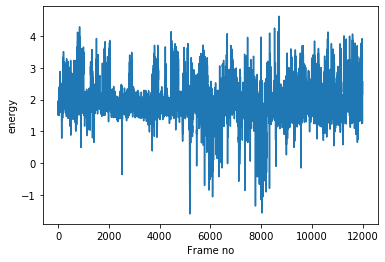

In [21]:
plt.subplot(1,1,1); plt.plot(F[9,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [12]:
F[1]

array([6.66225716e-06, 1.07035933e-05, 1.86304288e-05, ...,
       7.17663999e-05, 1.42080071e-04, 1.28079274e-04])

In [13]:
len(F[1])

63302

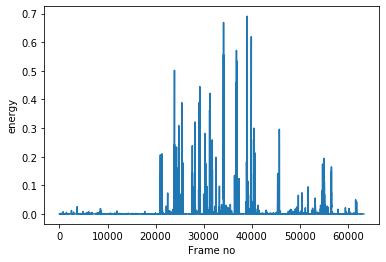

In [4]:
plt.subplot(1,1,1); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [ ]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
[Fs, x] = audioBasicIO.read_audio_file("pyAudioAnalysis/data/IS1000a.Headset-2.wav")
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
plt.subplot(1,1,1); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

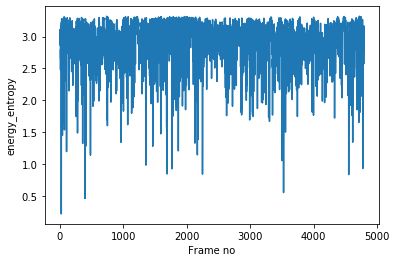

In [16]:
plt.subplot(1,1,1); plt.plot(F[2,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[2]); plt.show()

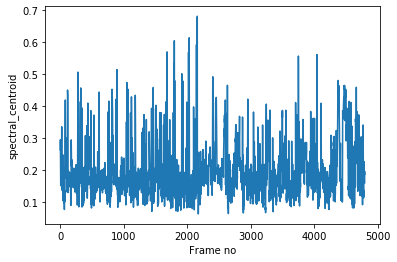

In [17]:
plt.subplot(1,1,1); plt.plot(F[3,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[3]); plt.show()

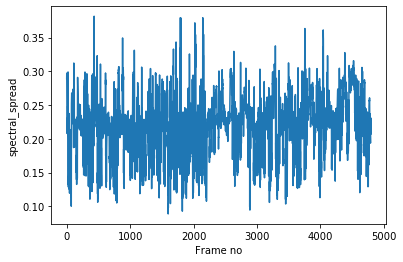

In [18]:
plt.subplot(1,1,1); plt.plot(F[4,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[4]); plt.show()

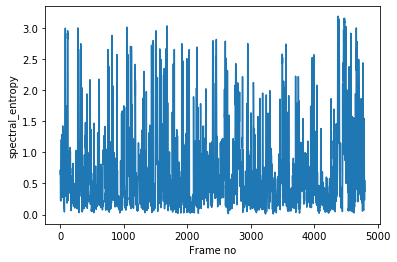

In [19]:
plt.subplot(1,1,1); plt.plot(F[5,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[5]); plt.show()

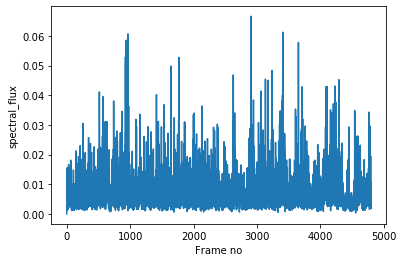

In [20]:
plt.subplot(1,1,1); plt.plot(F[6,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[6]); plt.show()

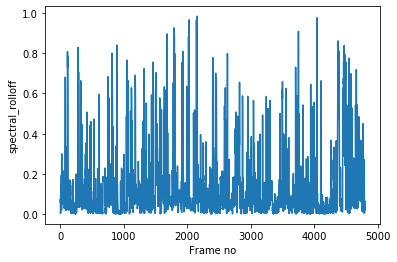

In [21]:
plt.subplot(1,1,1); plt.plot(F[7,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[7]); plt.show()

In [27]:
F[7,:]

array([0.06  , 0.0775, 0.0175, ..., 0.0175, 0.0675, 0.0075])